In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv('data/GNNdata.csv')

def get_examples(group):
  idx = pd.Series(df.iloc[:,group]).to_numpy().nonzero()
  if (idx[0].shape[0] == 0):
    # print('No examples exist! Group number: ' + str(group))
    return None
  # print('Total examples: ', idx[0].shape[0], idx[0].shape[0] <100)
  examples = np.random.choice(idx[0], size=(100,))
  return examples

def build_example_library():
  q = []
  q.append(None)
  for i in range(1,350):
    x = get_examples(i)
    if x is None:
      q.append(None)
      continue
    examples = pd.concat([df.iloc[x,0], df.iloc[x, 1:]], axis=1).drop_duplicates()
    q.append(examples)
  return q

examples = build_example_library()



In [10]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw



samples = []
for idx_g,g in enumerate(examples):
  if g is not None:
    smiles = []
    for idx in range(3):
      x = g.sample().iat[0, 0]
      try:
        Chem.MolFromSmiles(x)
      except:
        x = None
      smiles.append(x)
    samples.append(smiles)
  else:
      samples.append(None)

samples



[21:59:13] Can't kekulize mol.  Unkekulized atoms: 9 10 11 15 16
[21:59:13] Can't kekulize mol.  Unkekulized atoms: 6 7 9 10 11
[21:59:13] Can't kekulize mol.  Unkekulized atoms: 6 7 9 10 11
[21:59:13] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21
[21:59:13] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18
[21:59:13] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 19
[21:59:13] SMILES Parse Error: syntax error while parsing: C(CC(=O)O)[C@@H](C(=O)[O-Na+])N
[21:59:13] SMILES Parse Error: Failed parsing SMILES 'C(CC(=O)O)[C@@H](C(=O)[O-Na+])N' for input: 'C(CC(=O)O)[C@@H](C(=O)[O-Na+])N'
[21:59:13] SMILES Parse Error: syntax error while parsing: SiC
[21:59:13] SMILES Parse Error: Failed parsing SMILES 'SiC' for input: 'SiC'
[21:59:13] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 12 14
[21:59:13] Can't kekulize mol.  Unkekulized atoms: 7 8 9 14 15
[21:59:13] Can't kekulize mol.  Unkekulized atoms: 6 7 8 21 22
[21:59:13] Can't kekulize mol.  Unkekulized atoms: 

['C=CCN1NN=C(NC(=O)COc2ccccc2Cl)N1',
 'CCC=CCC=CCC=CCCCCCCCC(=O)OCC(COC(=O)CCCCCCCC=CCC=CCC=CCC)OC(=O)CCCCCCCC=CCC=CCC=CCC',
 'C=CCNC(=O)CNC(=O)c1ccc(Cl)cc1Cl']

In [11]:
samples[208]

['FC(F)(F)C(F)=C(F)C(F)(F)F',
 'FC(F)(F)C(F)=C(F)C(F)(F)F',
 'C(CC(=O)O)[C@@H](C(=O)[O-Na+])N']

[21:43:32] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 14
[21:43:32] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 18
[21:43:32] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11


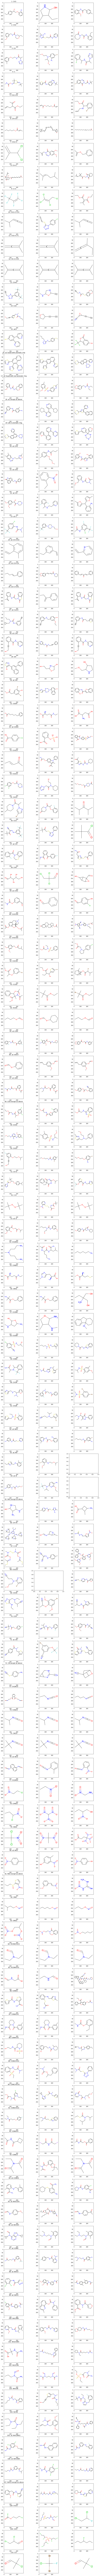

In [7]:

names = pd.read_excel('data/valence.xlsx').iloc[:,1]


fig, ax = plt.subplots(nrows=110,ncols=3, figsize=(15,400))
plt.axis('off')
for idx_g,g in enumerate(samples[1:111]):
    if g is not None:
        for idx, s in enumerate(g):
            if s is not None:
                if idx == 0:
                    ax[idx_g, idx].set_title(str(idx_g + 1) + ": " + names[idx_g])
                try:
                    mol = Chem.MolFromSmiles(s)
                    ax[idx_g, idx].imshow(Draw.MolToImage(mol))
                    ax[idx_g, idx].tick_params(bottom=False, left=False)
                except:
                    continue

plt.savefig('1-110.svg', bbox_inches='tight')
                


[21:57:04] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 18
[21:57:05] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18
[21:57:05] Can't kekulize mol.  Unkekulized atoms: 6 7 8 10 11
[21:57:05] SMILES Parse Error: syntax error while parsing: C(CC(=O)O)[C@@H](C(=O)[O-Na+])N
[21:57:05] SMILES Parse Error: Failed parsing SMILES 'C(CC(=O)O)[C@@H](C(=O)[O-Na+])N' for input: 'C(CC(=O)O)[C@@H](C(=O)[O-Na+])N'


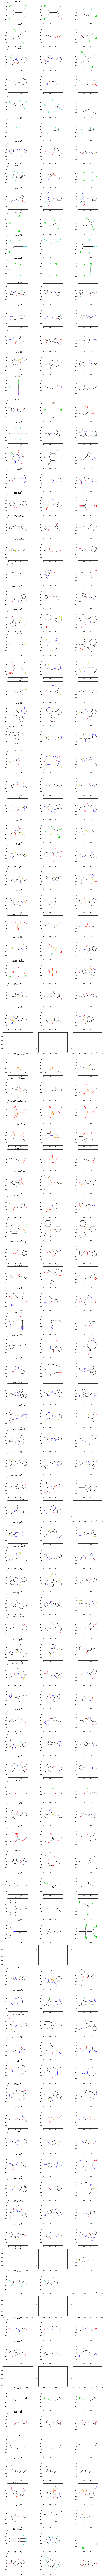

In [9]:

names = pd.read_excel('data/valence.xlsx').iloc[:,1]


fig, ax = plt.subplots(nrows=110,ncols=3, figsize=(15,400))
plt.axis('off')
for idx_g,g in enumerate(samples[111:221]):
    if g is not None:
        for idx, s in enumerate(g):
            if s is not None:
                if idx == 0:
                    ax[idx_g, idx].set_title(str(idx_g + 111) + ": " + names[idx_g + 110])
                try:
                    mol = Chem.MolFromSmiles(s)
                    ax[idx_g, idx].imshow(Draw.MolToImage(mol))
                    ax[idx_g, idx].tick_params(bottom=False, left=False)
                except:
                    continue

plt.savefig('111-220.svg', bbox_inches='tight')
                


[22:04:34] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 12 14
[22:04:34] Can't kekulize mol.  Unkekulized atoms: 7 8 9 14 15
[22:04:34] Can't kekulize mol.  Unkekulized atoms: 6 7 8 21 22
[22:04:34] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 18
[22:04:34] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 15
[22:04:35] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19


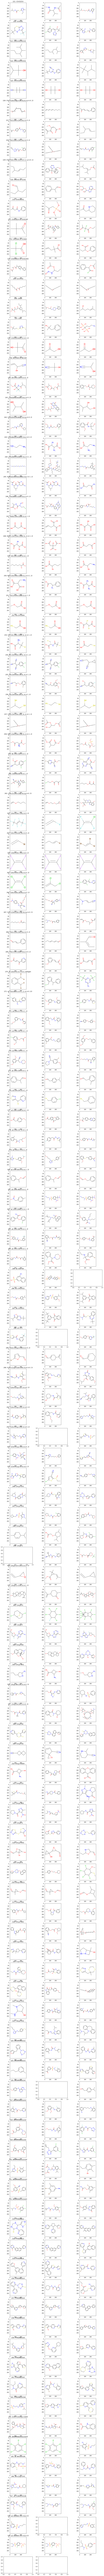

In [12]:

names = pd.read_excel('data/valence.xlsx').iloc[:,1]


fig, ax = plt.subplots(nrows=130,ncols=3, figsize=(15,400))
plt.axis('off')
for idx_g,g in enumerate(samples[221:350]):
    if g is not None:
        for idx, s in enumerate(g):
            if s is not None:
                if idx == 0:
                    ax[idx_g, idx].set_title(str(idx_g + 221) + ": " + names[idx_g+220])
                try:
                    mol = Chem.MolFromSmiles(s)
                    ax[idx_g, idx].imshow(Draw.MolToImage(mol))
                    ax[idx_g, idx].tick_params(bottom=False, left=False)
                except:
                    continue

plt.savefig('221-350.svg', bbox_inches='tight')
                
